# Substructures & substructure filters ~ CB1 ligands

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from itertools import chain



RDKit WARNING: [09:29:58] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
#Load data
df_can = pd.read_csv('cannabinoid.csv', delimiter=';')

In [3]:
#Clean data
df1 = df_can.dropna(subset=['Smiles'])

In [4]:
#List of molecules instances
ligandm_database = []
for ligand in df1["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))

In [5]:
#Load drugbank data
drugbank = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in drugbank if m]

In [6]:
#Function to count the matches
def count_match(data,pattern):
    counts = [len(m.GetSubstructMatches(pattern)) for m in data]
    counts_nonzero = [m for m in counts if m]
    lots_of_pattern = [m for m, i in zip(data, counts) if i == 8]
    return len(counts), len(counts_nonzero), round(sum(counts_nonzero)/len(counts_nonzero),2) ,max(counts_nonzero), round(len(counts_nonzero)/len(counts)*100,2)

In [7]:
#Function to visualized molecules with specified number of groups
def visualize_groups(data, pattern, x):
    counts = [len(m.GetSubstructMatches(pattern)) for m in data]
    lots_of_pattern = [m for m, i in zip(data, counts) if i == x]
    return Draw.MolsToGridImage(lots_of_pattern, molsPerRow=1, subImgSize=(500,500))

In [8]:
#Function for visualisation of matched atoms and bonds
def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

### Carboxyl group

In [9]:
#Carboxyl pattern
carboxyl_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')

In [28]:
#Acetic acid vs carboxyl group
acetic_acid = Chem.MolFromSmiles('CC(=O)O') 
acetic_acid.HasSubstructMatch(carboxyl_pattern)

True

In [11]:
#Toluen vs carboxyl group
toluene = Chem.MolFromSmiles('Cc1ccccc1')
toluene.HasSubstructMatch(carboxyl_pattern)

False

In [29]:
#Citric acid vs carboxyl group
citric_acid = Chem.MolFromSmiles('OC(=O)CC(O)(C(=O)O)CC(=O)O')
citric_acid.HasSubstructMatch(carboxyl_pattern)

True

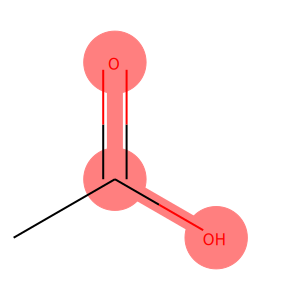

In [30]:
#Citric acid and carboxyl group
visualize_match(acetic_acid, carboxyl_pattern)

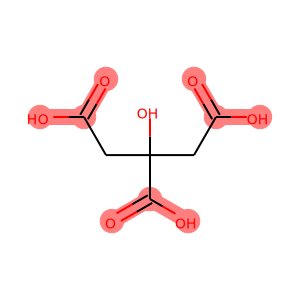

In [14]:
#Citric acid and carboxyl pattern
visualize_match(citric_acid, carboxyl_pattern)

In [15]:
#Carboxyl groups in my dataset
count_match(ligandm_database, carboxyl_pattern)

(2998, 195, 1.08, 4, 6.5)

From 2998 CB1 ligands only 195 have carboxyl group, which is about 6,5 %  molecules from the dataset. Approximately there is 1.08 carboxyl group per molecule. Maximum number of carboxyl group on one molecule is 4.

In [16]:
#Carboxyl groups in Drugbank
count_match(drugs, carboxyl_pattern)

(7113, 1635, 1.26, 8, 22.99)

From 2998 Drugbank ligands  1635 have carboxyl group, which is about 22,99 % molecules from the dataset. Approximately there is 1.26 carboxyl group per molecule. Maximum number of carboxyl group on one molecule is 8.

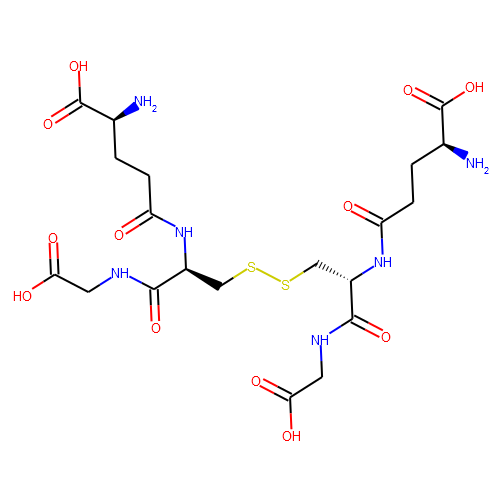

In [17]:
#Molecule with 4 carboxyl groups in my dataset
visualize_groups(ligandm_database, carboxyl_pattern, 4)

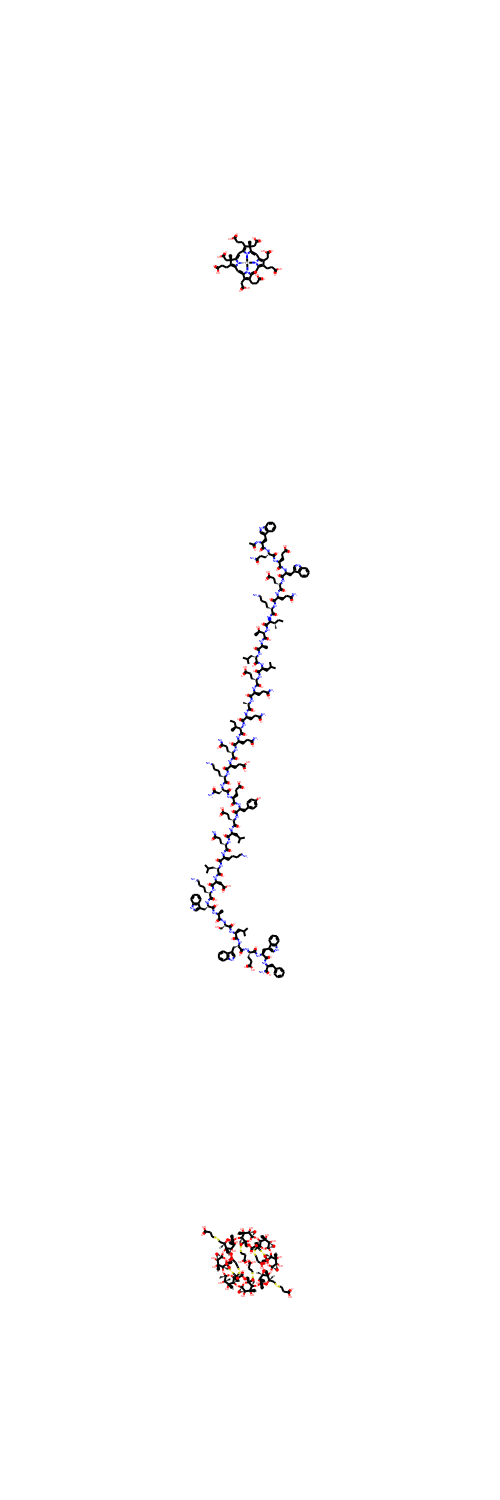

In [18]:
#Drugbank molecule with 4 carboxyl groups
visualize_groups(drugs, carboxyl_pattern, 8)

### Amino group

In [19]:
#Amino group
amino_pattern = Chem.MolFromSmarts('[NX3;H2,H1]')

In [20]:
#Benzen-1,2-diamin vs amino skupina
amino_benzen = Chem.MolFromSmiles('[NH2]c1ccccc1[NH2]')
amino_benzen.HasSubstructMatch(amino_pattern)

True

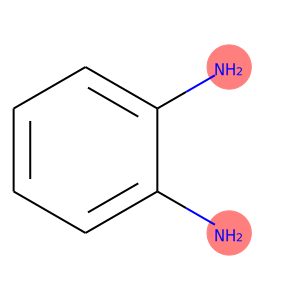

In [21]:
visualize_match(amino_benzen, amino_pattern)

In [22]:
#Amino group in my dataset
count_match(ligandm_database, amino_pattern)

(2998, 1988, 1.41, 32, 66.31)

From 2998 CB1 ligands 1988 have amino group, which is about 66,31 %  molecules from the dataset. Approximately there is 1.41 amino group per molecule. Maximum number of amino group on one molecule is 32.

In [23]:
#Amino groups in Drugbank
count_match(drugs, amino_pattern)

(7113, 4007, 1.84, 66, 56.33)

From 7113 Drugbank ligands 4007 have amino group, which is about 56,33 % molecule from the dataset. Approximately there is 1.84 amino group per molecule. Maximum number of amino group on one molecule is 66.

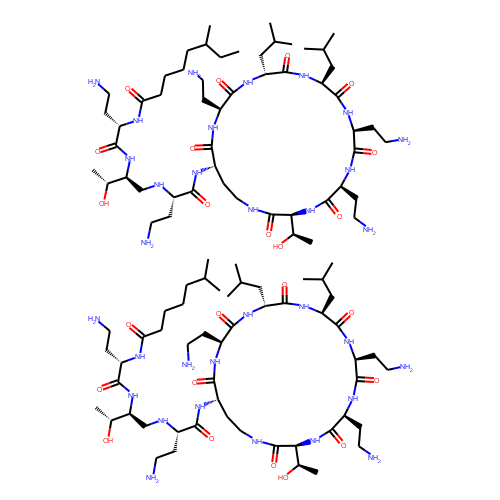

In [24]:
#CB1 ligand with 32 amino groups
visualize_groups(ligandm_database, amino_pattern, 32)

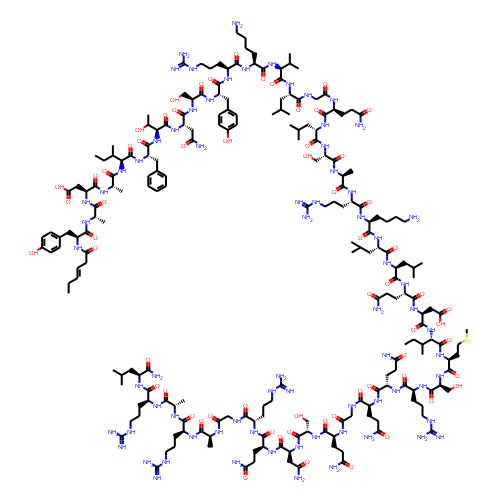

In [25]:
#Drugbank molecule with 66 amino groups
visualize_groups(drugs, amino_pattern, 66)

### Phenol group 

In [26]:
#Phenol group
phl_pattern = Chem.MolFromSmarts('[OH]c1ccccc1')

In [33]:
#THC vs carboxyl group
phenol = Chem.MolFromSmiles('CCCCCC1=CC(=C2C3C=C(CCC3C(OC2=C1)(C)C)C)O')
phenol.HasSubstructMatch(phl_pattern)

True

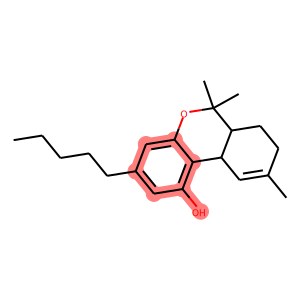

In [32]:
visualize_match(phenol, phl_pattern)

In [34]:
#Phenol group in my dataset
count_match(ligandm_database, phl_pattern)

(2998, 152, 1.53, 25, 5.07)

From 2998 CB1 ligands 152 have phenol group, which is about 5 % molecules from the dataset. Approximately there is 1.53 phenol group per molecule. Maximum number of phenol group on one molecule is 25.

In [42]:
#Phenol group in Drugbank
count_match(drugs, phl_pattern)

(7113, 688, 1.5, 15, 9.67)

From 7113 Drugbank ligands 688 have phenol group, which is about 9,67 % molecules from the dataset. Approximately there is 1.5 phenol group per molecule. Maximum number of phenol group on one molecule is 15.

In [43]:
phl1_pattern = Chem.MolFromSmarts('[OH]c1cccc(CCCCC)c1')

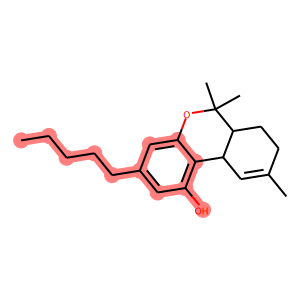

In [36]:
visualize_match(phenol, phl1_pattern)

In [41]:
#Phenol group in my dataset
count_match(ligandm_database, phl1_pattern)

(2998, 37, 1.54, 4, 1.23)

From 2998 CB1 ligands 37 have phenol group, which is about 1,23 % molecules from the dataset. Approximately there is 1.54 phenol group per molecule. Maximum number of phenol group on one molecule is 4.

In [38]:
#Phenol group in Drugbank
count_match(drugs, phl1_pattern)

(7113, 75, 2.24, 10, 1.05)

From 7113 Drugbank ligands 75 have phenol group, which is about 1,05 % molecules from the dataset. Approximately there is 2.24 phenol group per molecule. Maximum number of phenol group on one molecule is 10.

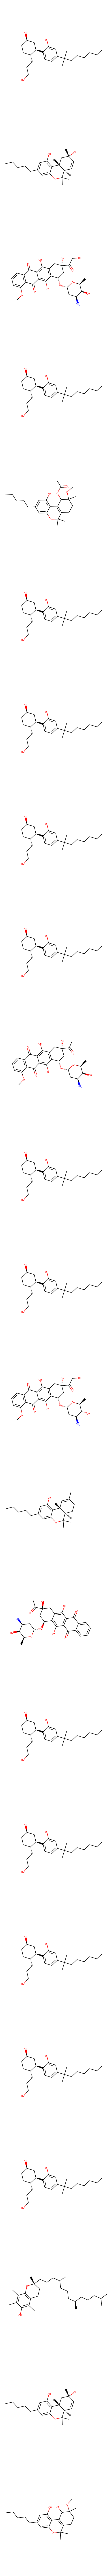

In [44]:
#CB1 ligand with phenol group
visualize_groups(ligandm_database, phl1_pattern, 1)

### Keto group

In [46]:
ketone_pattern = Chem.MolFromSmarts('[#6][CX3](=O)[#6]')

In [52]:
#Ketone grouo
ket = Chem.MolFromSmiles("C1(=O)CCC(=O)CC1")
ket.HasSubstructMatch(ketone_pattern)

True

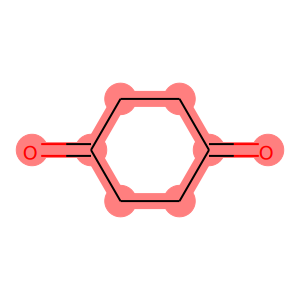

In [53]:
visualize_match(ket, ketone_pattern)

In [58]:
#Keto group in my dataset
count_match(ligandm_database, ketone_pattern)

(2998, 280, 1.21, 3, 9.34)

From 2998 CB1 ligands 280 have keto group, which is about 9,34 % molecules from the dataset. Approximately there is 1.21 keto group per molecule. Maximum number of keto group on one molecule is 3.

In [59]:
#Keto group in drugbank
count_match(drugs, ketone_pattern)

(7113, 653, 1.3, 3, 9.18)

From 7113 Drugbank ligands 653 have phenol group, which is about 9,18 % molecules from the dataset. Approximately there is 1.3 keto group per molecule. Maximum number of keto group on one molecule is 3.

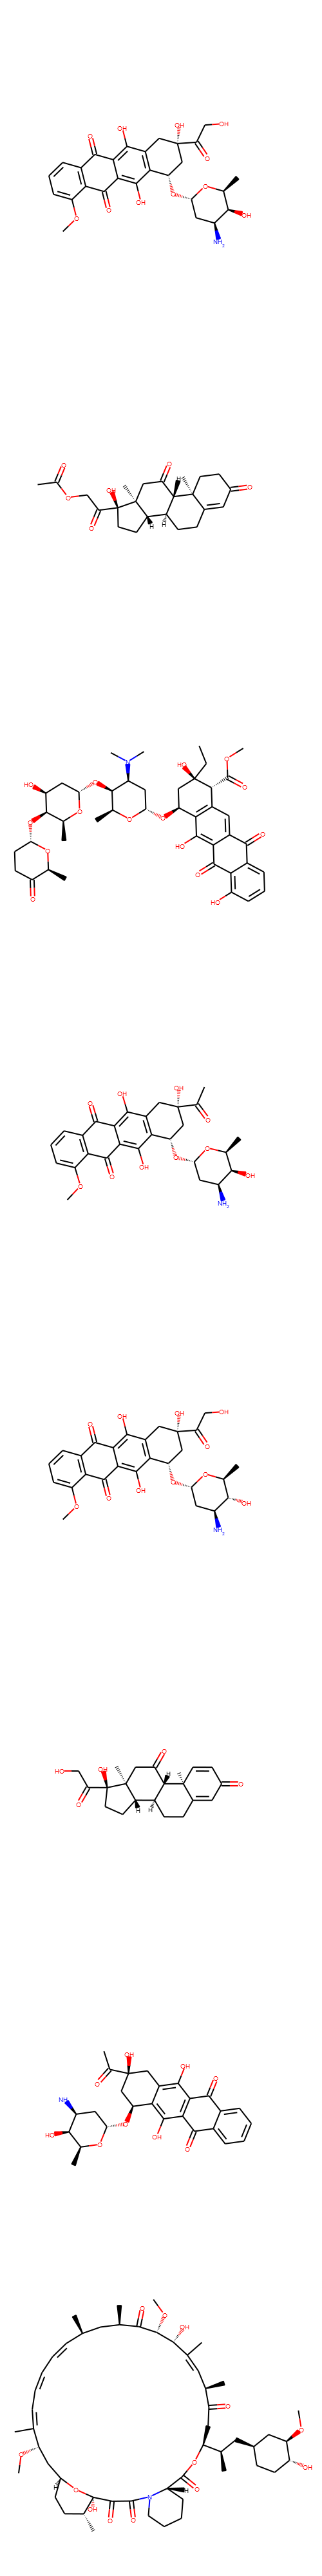

In [56]:
visualize_groups(ligandm_database, ketone_pattern, 3)

## Diazine group

In [60]:
azo_pattern = Chem.MolFromSmarts('[NX2]=[NX2]')

In [61]:
count_match(ligandm_database, azo_pattern)

(2998, 4, 1.0, 1, 0.13)

From 2998 CB1 ligands 4 have azo group, which is about 0,13 % molecules from the dataset. Approximately there is 1 azo group per molecule. Maximum number of azo group on one molecule is 1.

In [62]:
count_match(drugs, azo_pattern)

(7113, 38, 1.16, 2, 0.53)

From 7113 Drugbank ligands 38 have azo group, which is about 0,53 % molecules from the dataset. Approximately there is 1.16 azo group per molecule. Maximum number of azo group on one molecule is 2.

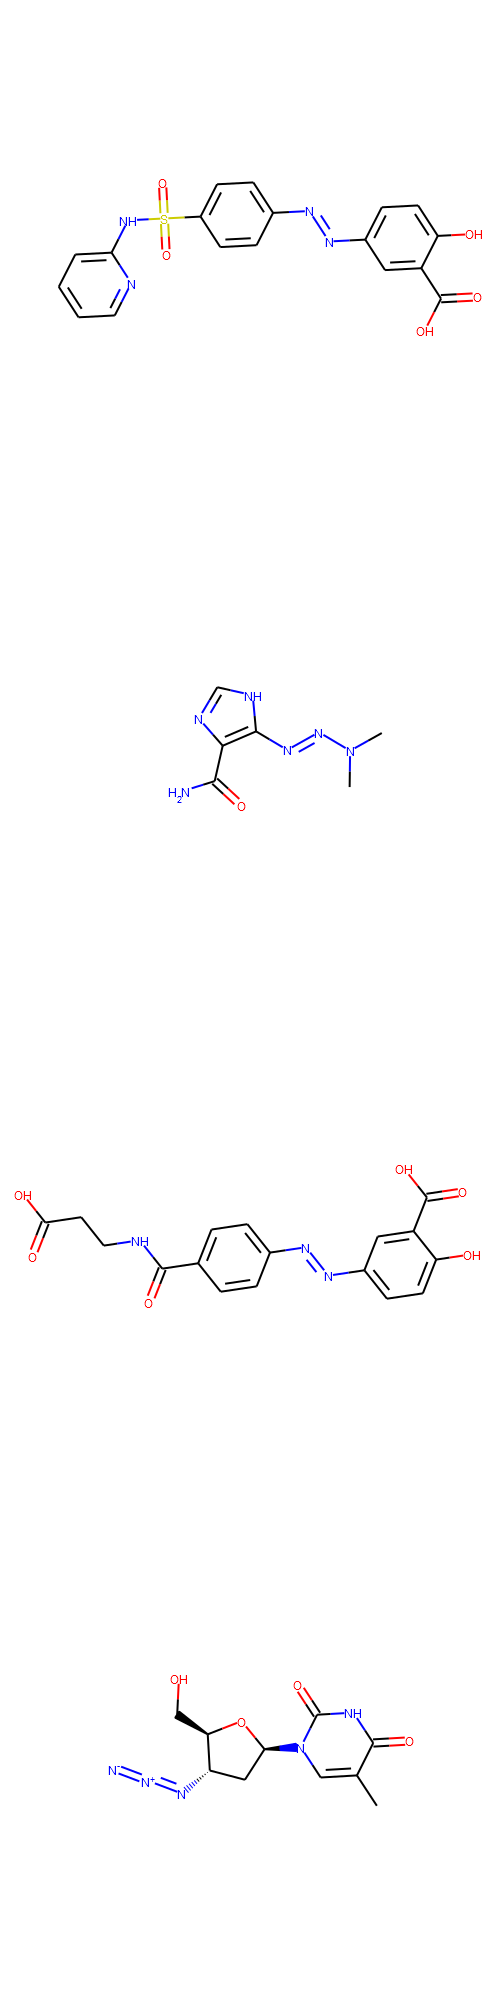

In [63]:
visualize_groups(ligandm_database, azo_pattern, 1)

### Salicylic_acid_pattern

In [64]:
salicylic_acid_pattern = Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O')


In [65]:
count_match(ligandm_database, salicylic_acid_pattern)

(2998, 11, 1.09, 2, 0.37)

From 2998 CB1 ligands 11 have salicyl acid pattern, which is about 0,37 % molecules from the dataset. Approximately there is 2 patterns per molecule. Maximum number of thuis pattern on one molecule is 2.

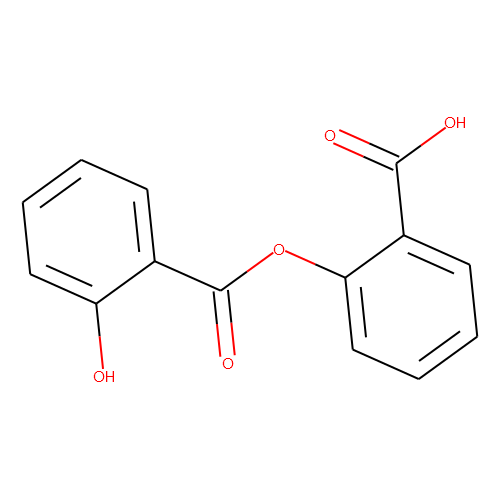

In [66]:
visualize_groups(ligandm_database, salicylic_acid_pattern, 2)

In [67]:
count_match(drugs, salicylic_acid_pattern)

(7113, 50, 1.18, 3, 0.7)

From 7113 Drugbank ligands 50 have salicylic pattern, which is about 0,7 % molecules from the dataset. Approximately there is 1.18 azo group per molecule. Maximum number of this pattern on one molecule is 3.

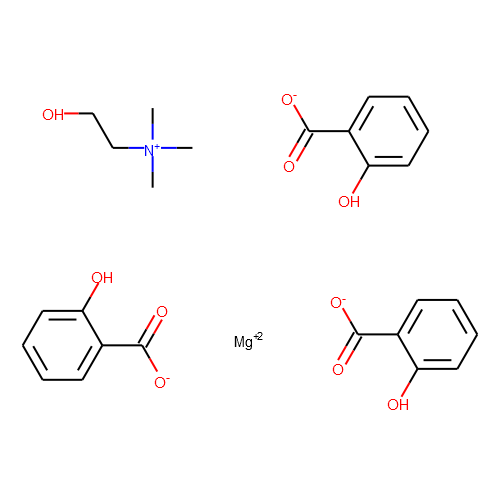

In [68]:
visualize_groups(drugs, salicylic_acid_pattern, 3)

## PAINS

In [69]:
from itertools import chain
# load PAINS structures in SMARTS format from two files in data
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
pains, len(pains)


([[<rdkit.Chem.rdchem.Mol at 0x23b9b3bb940>, 'anil_di_alk_F(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3ddee0>, 'hzone_anil(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bb990>, 'het_5_pyrazole_OH(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bba30>, 'het_thio_666_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bba80>, 'styrene_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbb20>, 'ne_rhod_C(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbbc0>, 'hp_amino_CN_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbc10>, 'cyano_imine_C(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbc60>, 'thio_urea_A(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbd00>, 'thiophene_amino_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbda0>, 'keto_keto_beta_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbdf0>, 'keto_phenone_A(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbe90>, 'cyano_pyridone_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3bbf30>, 'thiaz_ene_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x23b9b3c6030>, 'hzone_thiophene

In [70]:
for m in ligandm_database: 
    m.pain_hits = [i for i, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]
can_with_pains = [m for m in ligandm_database if m.pain_hits]

len(can_with_pains)

27

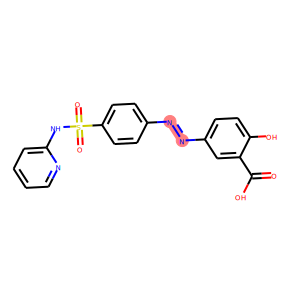

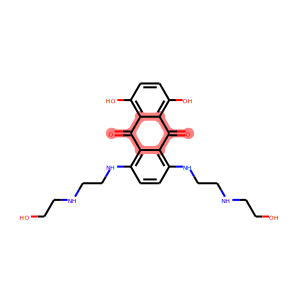

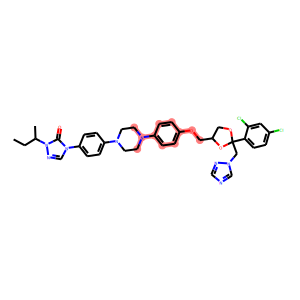

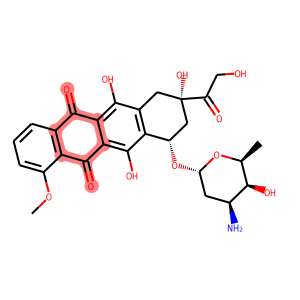

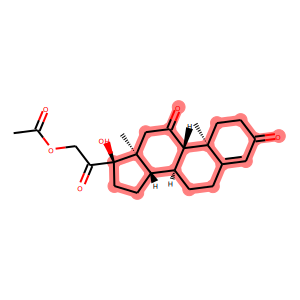

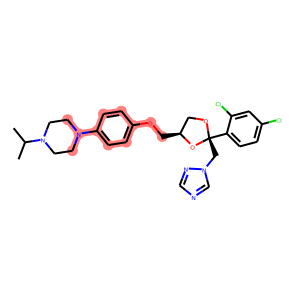

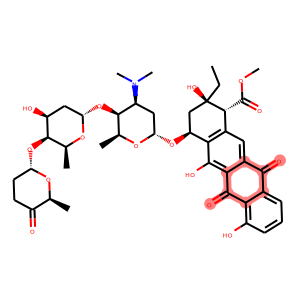

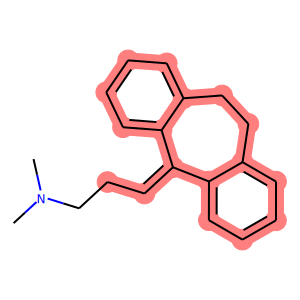

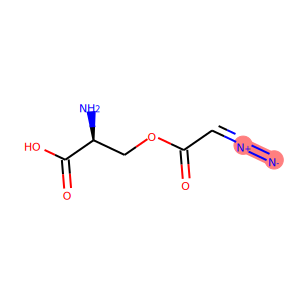

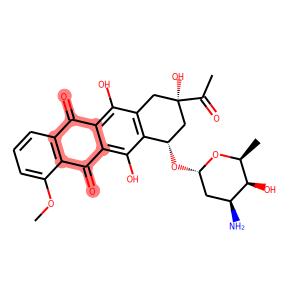

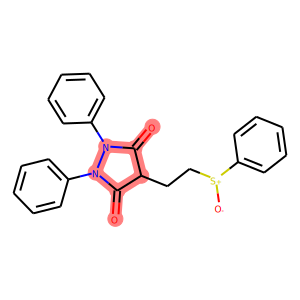

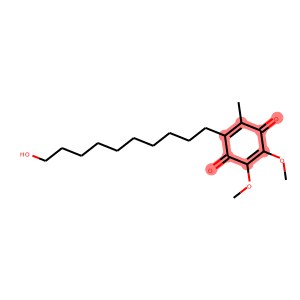

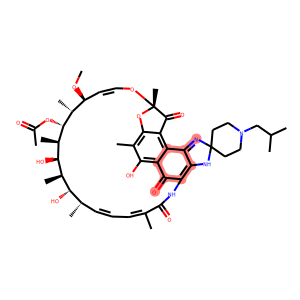

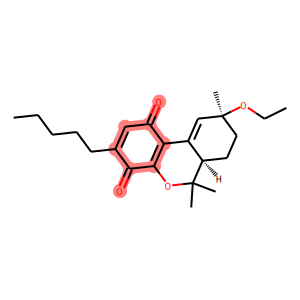

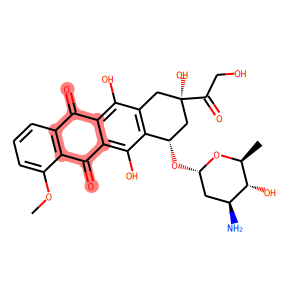

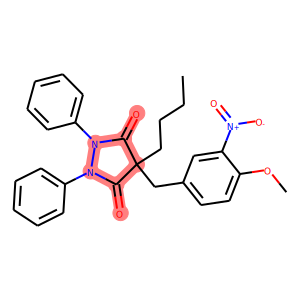

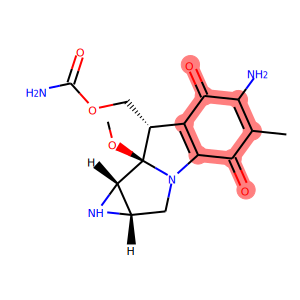

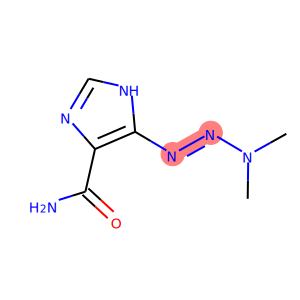

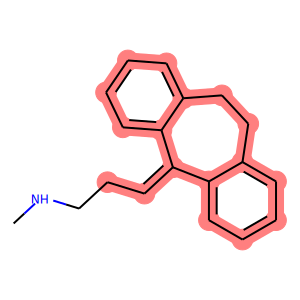

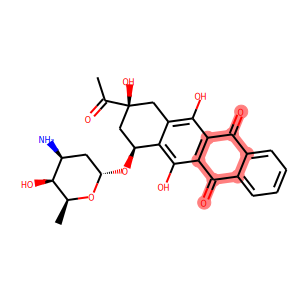

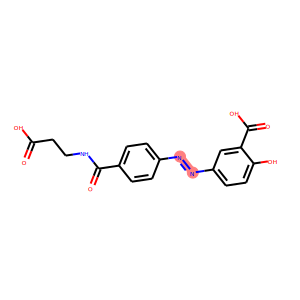

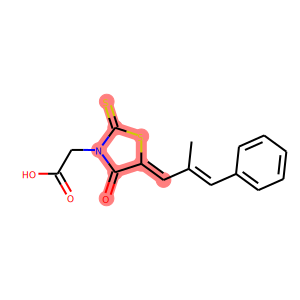

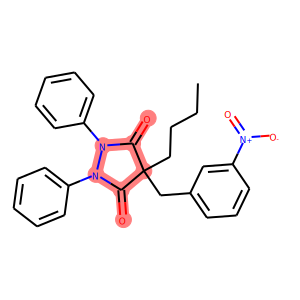

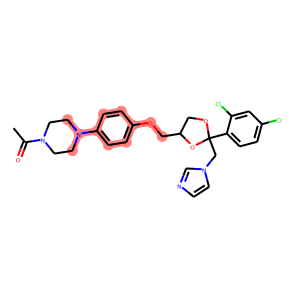

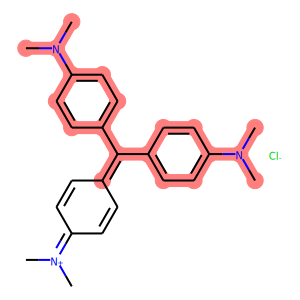

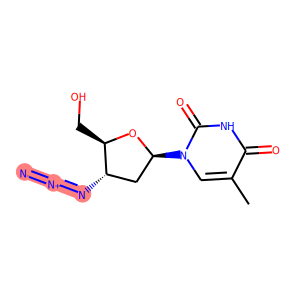

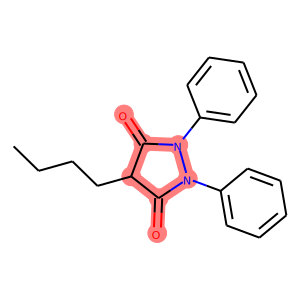

In [71]:
for i in range(0,27):
    visualize_match(can_with_pains[i], pains[can_with_pains[i].pain_hits[0]][0])

In [72]:
for m in drugs: 
    m.pain_hits = [i for i, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]
drugs_with_pains = [m for m in drugs if m.pain_hits]

len(drugs_with_pains)

125